# Downloading COVID Data From FloridaDisaster.ORG

### To Do
- [ ] Turn all of the processes into functions
- [X] Fix/find out why reports 3/19 - 3/24 are only 1kb and hold no data (There were 3 different page titles not 2)
- [X] Clean the changing column names at the text export stage
- [X] Figure out my headers are messed up
- [ ] Why are there so many obs for 3/18
- [ ] **IMPORTANT**: THE LARGE NEGATIVE NUMBERS FOR DADE DO NOT SEEM TO BE CORRECT. FIND OUT WHAT IS GOING ON THERE
- [ ] **IMPORTANT**: Something happens to the data at 7/6 after this point everything is wrong, whyy???
- [ ] **IMPORTANT**: Fix this error '5-31-2020('
- [X] Fix the problem where before doh reported 0 as 0 and not missing, I can't use the data
- [X] Extract the page range 12-25
- [X] Find the pages that contain the words "Coronavirus: All persons tested"
- [X] Extract just those two pages pdf 
- [X] Export individual files to txt for storage



In [296]:
from selenium import webdriver
import os
import wget
import PyPDF2 as pdf
from PyPDF2 import PdfFileReader, PdfFileWriter
import time
import textract
from pathlib import Path
import re
import pandas as pd
import datetime

In [306]:
chrome_path = r"chromedriver.exe"

## Initializing driver element and finding 

In [307]:
driver = webdriver.Chrome(chrome_path)

In [308]:
driver.get('https://floridadisaster.org/covid19/covid-19-data-reports/')
title = driver.title
time.sleep(3)
result = driver.find_elements_by_xpath("//a[@href]")

Initializing the output paths

In [295]:
output_path = Path('C:\\Users\\chacr\\OneDrive\\Documents\\Coding\\Python\\USF\\COVID-19 Project\\Data\\PDF')
pdf_output_path= output_path.resolve()
pdf_extract_path = Path('C:\\Users\\chacr\\OneDrive\\Documents\\Coding\\Python\\USF\\COVID-19 Project\\Data\\Unclean PDF')
pdf_extract_path = pdf_extract_path.resolve()

In [8]:
pdf_output_path

WindowsPath('C:/Users/chacr/OneDrive/Documents/Coding/Python/USF/COVID-19 Project/Data/PDF')

## Downloads the PDF Files from the FDEM Website

In [9]:
link_counter = 0
len_result = len(result)
for links in result:
    if links.text.find('Data Report') > 0:
        link_url = links.get_attribute('href')
        filename = wget.filename_from_url(link_url)
        if not os.path.exists(f'{pdf_output_path}/{filename}'):
            wget.download(link_url, out = f'{pdf_output_path}')
        link_counter +=1
        print (f'{round((link_counter * 2)/len_result,3)*100}% Complete',end='\r')

In [309]:
driver.close()

### Extracting the min and max page range for the COVID-19 Daily County Data

In [303]:
#turn into a function
def PdfPageExtract(input_path, output_path, page_num):
    import time
    import os
    import PyPDF2 as pdf
    from PyPDF2 import PdfFileReader, PdfFileWriter
    import textract
    print('Program Started')
    page_counter = 0
    today = datetime.date.today()
    file_num = len(os.listdir(input_path))
    file_exist_n =0
    progress = 0
    for files in os.listdir(input_path):
        output = f'{output_path}/(7-11-20) Unclean Extract from {files}'
        progress += 1
        if os.path.exists(output):
            file_exist_n +=1
            print(f'{round((progress/file_num)* 100,3)}% Complete')
            continue
        else:

            pdf_writer = PdfFileWriter()
            pdf_file = open(f'{input_path}/{files}','rb')
            pdfreader = PdfFileReader(pdf_file)
            num_pages = pdfreader.numPages
            if num_pages < page_num:
                up_limit = num_pages
            else:
                up_limit = page_num
            for pages in range(3, up_limit):
                page =  pdfreader.getPage(pages)  
                if page.extractText().find('Coronavirus: PUI testing by county') > 0 or page.extractText().find('Coronavirus: All persons tested') > 0 or page.extractText().find('Coronavirus: PUI testing by county') > 0 or page.extractText().find('Coronavirus: All') > 0:
                    pdf_writer.addPage(page)          
            with open(output, 'wb') as output_pdf:
                pdf_writer.write(output_pdf)
            print(f'{round((progress/file_num)* 100,3)}% Complete')
    
    if file_exist_n == file_num:
        print('All Files Previously Created')
    else:
        print(f'{file_num -file_exist_n} New Files Created')

page_limit = 23

PdfPageExtract(pdf_output_path, pdf_extract_path, page_limit)


Program Started
0.662% Complete
1.325% Complete
1.987% Complete
2.649% Complete
3.311% Complete
3.974% Complete
4.636% Complete
5.298% Complete
5.96% Complete
6.623% Complete
7.285% Complete
7.947% Complete
8.609% Complete
9.272% Complete
9.934% Complete
10.596% Complete
11.258% Complete
11.921% Complete
12.583% Complete
13.245% Complete
13.907% Complete
14.57% Complete
15.232% Complete
15.894% Complete
16.556% Complete
17.219% Complete
17.881% Complete
18.543% Complete
19.205% Complete
19.868% Complete
20.53% Complete
21.192% Complete
21.854% Complete
22.517% Complete
23.179% Complete
23.841% Complete
24.503% Complete
25.166% Complete
25.828% Complete
26.49% Complete
27.152% Complete
27.815% Complete
28.477% Complete
29.139% Complete
29.801% Complete
30.464% Complete
31.126% Complete
31.788% Complete
32.45% Complete
33.113% Complete
33.775% Complete
34.437% Complete
35.099% Complete
35.762% Complete
36.424% Complete
37.086% Complete
37.748% Complete
38.411% Complete
39.073% Complete
3

# Converting the PDFs to html files

In [1]:
from pathlib import Path

input_path = Path('C:\\Users\\chacr\\OneDrive\\Documents\\Coding\\Python\\USF\\COVID-19 Project\\Data\\Unclean PDF')
output_path = Path('C:\\Users\\chacr\\OneDrive\\Documents\\Coding\\Python\\USF\\COVID-19 Project\\Data\\html')
ip = input_path.resolve()
op = output_path.resolve()

In [2]:
print(re.sub(r'(.+\D)(\d)(.*\Z)', '\1'))

NameError: name 're' is not defined

In [ ]:
import os
import pdftotree
import re
import sys
print('Program started')
file_n = len(os.listdir(ip))
file_ct = 0
file_exist_n =0
error_list = []
date1 = r'^.*(\d+)-*(\d{2})-*(\d{4}).*\Z'
date2 = r'^.*(\d+)_(\d+)_(\d+).*\Z'
date3 = r'^.*(\d{4})-*(\d{2})-*(\d{2}).*\Z'
date4 = r'^.*(\d)\.(\d{2})\.(\d+).*\Z'
date5 = r'^.*(\d{2})_(\d{2})\Z'
date_format = r'(^.+)\D(\d-)(.*\Z)'
last_file_name = ''
for files in os.listdir(ip):
    file_ct += 1
    if re.search(date3,files):
        new_file_name = re.sub(date3, r'html version of FL COVID Rep \2-\3-\1.html',files)    
    elif re.search(date1,files):
        new_file_name = re.sub(date1, r'html version of FL COVID Rep \1-\2-\3.html',files)
    elif re.search(date2,files):
        new_file_name = re.sub(date2, r'html version of FL COVID Rep \1-\2-\3.html',files)
    elif re.search(date4,files):
        new_file_name = re.sub(date4, r'html version of FL COVID Rep \1-\2-\3.html',files).replace('-20.html','-2020.html')
    elif re.search(date5,files):
        new_file_name = re.sub(date5, r'html version of FL COVID Rep \1-\2-2020.html',files)
    
    new_file_name = re.sub('20-20-0606', '06-06-2020', new_file_name)  
    new_file_name = re.sub(date_format, r'\1 0\2\3', new_file_name)


    if last_file_name == new_file_name:
        new_file_name = new_file_name.replace('.html', '(PM).html')
    in_file_path = f'{ip}/{files}'       
    try:
      
        output_file_path = f'{op}\\{new_file_name}.html'
        if os.path.exists(output_file_path):
            file_exist_n +=1
            continue
        else:
            html = pdftotree.parse(in_file_path)
            with open(output_file_path,'w') as f:
                f.write(html)
            last_file_name = new_file_name
    except: 
        error_list.append(files)
    print(f'{round((file_ct/file_n)*100)}% Complete') 
if file_exist_n == file_n:
    print('All Files Previously Created')
else:
    print(f'{file_n - file_exist_n} New Files Created')

Program started
1% Complete
1% Complete
2% Complete
3% Complete
3% Complete
4% Complete
5% Complete
5% Complete
6% Complete
7% Complete
7% Complete
8% Complete
9% Complete
9% Complete
10% Complete
11% Complete
11% Complete
12% Complete
13% Complete
13% Complete
14% Complete
15% Complete
15% Complete
16% Complete
17% Complete
17% Complete
18% Complete
19% Complete
19% Complete
20% Complete
21% Complete
21% Complete
22% Complete
23% Complete
23% Complete
24% Complete
25% Complete
25% Complete
26% Complete
26% Complete
27% Complete
28% Complete
28% Complete
29% Complete
30% Complete
30% Complete
31% Complete
32% Complete
32% Complete
33% Complete
34% Complete
34% Complete
35% Complete
36% Complete
36% Complete
37% Complete
38% Complete
38% Complete
39% Complete
40% Complete
40% Complete
41% Complete
42% Complete


### Need to fix at some point

In [ ]:
def HtmlMaker(input_path, output_path, output_name):
    import os
    import pdftotree
    import re
    print('Program started')
    file_n = len(os.listdir(input_path))
    file_ct = 0
    error_list = []
    search_list = [r'^.*(\d+)-*(\d{2})-*(\d{4}).*\Z', r'^.*(\d+)_(\d+)_(\d+).*\Z', r'^.*(\d{4})-*(\d{2})-*(\d{2}).*\Z', r'^.*(\d)\.(\d{2})\.(\d+).*\Z', r'^.*(\d{2})_(\d{2})\Z']
    result_list = [fr'html version of {output_name} \2-\3-\1.html', fr'html version of {output_name} \2-\3-\1.html', fr'html version of {output_name} \1-\2-\3.html', fr'html version of {output_name} \1-\2-\3.html', fr'html version of {output_name} \1-\2-2020.html']
    last_file_name = ''

    file_exist_n = 0
    for files in os.listdir(input_path):
        looking = 1
        file_ct += 1
        for searches in search_list:
            counter = 0
            while looking == 1:
                if re.search(searches,files):
                    new_file_name = re.sub(searches, result_list[counter],files).replace('-20.html','-2020.html')
                    looking = 0
                    print(files, 'found it at', counter)
                counter += 1
                if counter  > 20:
                    break
        if last_file_name == new_file_name:
            new_file_name = new_file_name.replace('.html', '(PM).html')
        in_file_path = f'{input_path}/{files}'
        try:
            html = pdftotree.parse(in_file_path)
            output_file_path = f'{output_path}\\{new_file_name}.html'
            print(output_file_path)
            if os.path.exists(output_file_path):
                file_exist_n +=1
                continue
            else:
                print('I\'LL SEE YOU IN HELL!!!!')
                with open(output_file_path,'w') as f:
                    f.write(html)
                last_file_name = new_file_name
        except: 
            error_list.append(files)
        print(f'{round((file_ct/file_n)*100)}% Complete')
    if file_exist_n == file_num:
        print('All Files Previously Created')
    else:
        print(f'{file_n -file_exist_n} New Files Created')
            
            
file_name = 'FL COVID Rep'
HtmlMaker(ip, op, file_name)

Program started
(7-11-20) Unclean Extract from 06062020state_reports_latest.pdf found it at 0
C:\Users\chacr\OneDrive\Documents\Coding\Python\USF\COVID-19 Project\Data\html\html version of FL COVID Rep 06-2020-6.html.html
I'LL SEE YOU IN HELL!!!!
1% Complete
(7-11-20) Unclean Extract from 06_13_2020state_reports_latest.pdf found it at 0
C:\Users\chacr\OneDrive\Documents\Coding\Python\USF\COVID-19 Project\Data\html\html version of FL COVID Rep 13-2020-6.html.html
I'LL SEE YOU IN HELL!!!!
1% Complete
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-03-16-1815.pdf found it at 0
C:\Users\chacr\OneDrive\Documents\Coding\Python\USF\COVID-19 Project\Data\html\html version of FL COVID Rep 16-1815-3.html.html
I'LL SEE YOU IN HELL!!!!
2% Complete
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-03-18-0955.pdf found it at 0
C:\Users\chacr\OneDrive\Documents\Coding\Python\USF\COVID-19 Project\Data\html\html version of FL COVID Rep 18-0955-3.html.html
I'LL SEE YOU IN

C:\Users\chacr\OneDrive\Documents\Coding\Python\USF\COVID-19 Project\Data\html\html version of FL COVID Rep 03-0955-4.html.html
I'LL SEE YOU IN HELL!!!!
22% Complete
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-04-03-1725.pdf found it at 0
C:\Users\chacr\OneDrive\Documents\Coding\Python\USF\COVID-19 Project\Data\html\html version of FL COVID Rep 03-1725-4.html.html
I'LL SEE YOU IN HELL!!!!
23% Complete
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-04-04-0949.pdf found it at 0
C:\Users\chacr\OneDrive\Documents\Coding\Python\USF\COVID-19 Project\Data\html\html version of FL COVID Rep 04-0949-4.html.html
I'LL SEE YOU IN HELL!!!!
23% Complete
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-04-04-1653.pdf found it at 0
C:\Users\chacr\OneDrive\Documents\Coding\Python\USF\COVID-19 Project\Data\html\html version of FL COVID Rep 04-1653-4.html.html
I'LL SEE YOU IN HELL!!!!
24% Complete
(7-11-20) Unclean Extract from covid-19-data---daily-r

C:\Users\chacr\OneDrive\Documents\Coding\Python\USF\COVID-19 Project\Data\html\html version of FL COVID Rep 19-1644-4.html.html
I'LL SEE YOU IN HELL!!!!
44% Complete
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-04-20-0938.pdf found it at 0
C:\Users\chacr\OneDrive\Documents\Coding\Python\USF\COVID-19 Project\Data\html\html version of FL COVID Rep 20-0938-4.html.html
I'LL SEE YOU IN HELL!!!!
44% Complete
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-04-20-1640.pdf found it at 0
C:\Users\chacr\OneDrive\Documents\Coding\Python\USF\COVID-19 Project\Data\html\html version of FL COVID Rep 20-1640-4.html.html
I'LL SEE YOU IN HELL!!!!
45% Complete
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-04-21-0949.pdf found it at 0
C:\Users\chacr\OneDrive\Documents\Coding\Python\USF\COVID-19 Project\Data\html\html version of FL COVID Rep 21-0949-4.html.html
I'LL SEE YOU IN HELL!!!!
46% Complete
(7-11-20) Unclean Extract from covid-19-data---daily-r

## Importing the html files

In [313]:
import pandas as pd
import time
from bs4 import BeautifulSoup as soup
import os
from pathlib import Path
import datetime

In [314]:
today = datetime.date.today()
html_path = Path('C:\\Users\\chacr\\OneDrive\\Documents\\Coding\\Python\\USF\\COVID-19 Project\\Data\\html').resolve()
txt_path = Path('C:\\Users\\chacr\\OneDrive\\Documents\\Coding\\Python\\USF\\COVID-19 Project\\Data\\TXT2').resolve()

## Converting html to text and storing data



In [488]:
import sys

header1 = ['COUNTY', 'AWAITING_TESTING', 'NEGATIVE', 'POSITIVE', 'PERCENT_POSITIVE', 'TOTAL_TESTED', 'FILE_NAME']
header2 = ['COUNTY', 'AWAITING_TESTING', 'NEGATIVE', 'POSITIVE', 'INCONCLUSIVE',  'TOTAL_TESTED', 'PERCENT_POSITIVE','FILE_NAME']
header3 = ['COUNTY', 'AWAITING_TESTING', 'INCONCLUSIVE', 'NEGATIVE', 'POSITIVE', 'PERCENT_POSITIVE', 'TOTAL_TESTED','FILE_NAME']

final_df = pd.DataFrame(columns=header1)

file_counter = 0
for files in os.listdir(html_path):
    file_path = f'{html_path}/{files}'
    file =open(file_path,'r')
    file_n = len(os.listdir(html_path))
    page_soup = soup(file, 'lxml')
    table_soup = page_soup.findAll("table")
    row_counter = 0
    head_use = 999
    for tables in range(0, len(table_soup)):
        table_html = table_soup[tables]
        for row in table_html.findAll('tr'):
            row_length = len(row)
            counter = 1
            data_list = []
            for col in row.findAll('td'):

                if row_counter == 0:
                    data_list.append(col.text.replace(' ', '_').upper())
                
                else:
                    data_list.append(col.text.replace(',','').replace('%',''))
                
                if len(data_list) == row_length:  
                     
                    data_list.append(files.replace('.html','').strip('\n'))
                    
                    if len(data_list) == 7:
                        if row_counter == 0 and file_counter < 4:
                            df = pd.DataFrame(columns=header1)
                            head_use = 1
                        
                        elif row_counter > 0 and data_list[0] != 'County' and len(data_list[0]) != 0 and data_list[0].find('or by mai') < 0:
                            data = pd.DataFrame([data_list], columns = header1)
                            df = pd.concat([df,data])

                    elif len(data_list) > 7:
                        if row_counter == 0 and file_counter < 12 and file_counter > 3:
                            df = pd.DataFrame(columns=header2)
                            head_use = 2             
                        elif row_counter == 0:
                            df = pd.DataFrame(columns=header3)
                            head_use = 3
                            print(file_counter, files)
                            
                        if row_counter > 0 and data_list[0] != 'County' and len(data_list[0]) != 0 and data_list[0].find('or by mai') < 0:
                            if files.replace('.html','').strip('\n').find('html version of FL COVID Rep 03-24-2020') >= 0 and len(data_list) == 9:
                                data_list.pop(4)
                                if head_use == 2:
                                    data = pd.DataFrame([data_list], columns = header2)
                                    df = pd.concat([df,data])
                                else:
                                    data = pd.DataFrame([data_list], columns = header3)
                                    df = pd.concat([df,data])                                    

                            else:
                                if len(data_list)== 9 and file_counter > 11 and file_counter <35:
                                    data_list.pop(3)
                                if head_use == 2:
                                    data = pd.DataFrame([data_list], columns = header2)
                                    df = pd.concat([df,data])
                                else:
                                    data = pd.DataFrame([data_list], columns = header3)
                                    df = pd.concat([df,data])  
            row_counter += 1
#     outfile = f'{txt_path}/{files.replace("html.html", "txt").replace("html version", "txt version")}'
    outfile1 = f'{txt_path}/{files.replace("html.html", "csv").replace("html version", "txt version")}'
    file_counter +=1
#     df.to_csv(outfile,sep='\t', index = False)
    df.to_csv(outfile1,sep=',', index = False)
    print(f'{round((file_counter/file_n)*100,3)}% complete')
    final_df = final_df.append(df, ignore_index=True)

    

0.68% complete
1.361% complete
2.041% complete
2.721% complete
3.401% complete
4.082% complete
4.762% complete
5.442% complete
6.122% complete
6.803% complete
7.483% complete
8.163% complete
12 html version of FL COVID Rep 03-25-2020(PM).html.html
8.844% complete
13 html version of FL COVID Rep 03-25-2020.html.html
9.524% complete
14 html version of FL COVID Rep 03-26-2020(PM).html.html
10.204% complete
15 html version of FL COVID Rep 03-26-2020.html.html
10.884% complete
16 html version of FL COVID Rep 03-27-2020(PM).html.html
11.565% complete
17 html version of FL COVID Rep 03-27-2020.html.html
12.245% complete
18 html version of FL COVID Rep 03-28-2020(PM).html.html
12.925% complete
19 html version of FL COVID Rep 03-28-2020.html.html
13.605% complete
20 html version of FL COVID Rep 03-29-2020(PM).html.html
14.286% complete
21 html version of FL COVID Rep 03-29-2020.html.html
14.966% complete
22 html version of FL COVID Rep 03-30-2020(PM).html.html
15.646% complete
23 html version o

85.034% complete
125 html version of FL COVID Rep 07-05-2020.html.html
85.714% complete
126 html version of FL COVID Rep 07-06-2020(PM).html.html
86.395% complete
127 html version of FL COVID Rep 07-06-2020.html.html
87.075% complete
128 html version of FL COVID Rep 07-07-2020.html.html
87.755% complete
129 html version of FL COVID Rep 07-08-2020.html.html
88.435% complete
130 html version of FL COVID Rep 07-09-2020.html.html
89.116% complete
131 html version of FL COVID Rep 07-10-2020(PM).html.html
89.796% complete
132 html version of FL COVID Rep 07-10-2020.html.html
90.476% complete
133 html version of FL COVID Rep 20-20-0606.html.html
91.156% complete
134 html version of FL COVID Rep 5-15-2020.html.html
91.837% complete
135 html version of FL COVID Rep 5-17-2020.html.html
92.517% complete
136 html version of FL COVID Rep 5-18-2020.html.html
93.197% complete
137 html version of FL COVID Rep 5-19-2020.html.html
93.878% complete
138 html version of FL COVID Rep 5-26-2020.html.html
94.

> This is **outdated** code

In [369]:
header = ['COUNTY', 'AWAITING_TESTING', 'NEGATIVE', 'POSITIVE', 'PERCENT_POSITIVE', 'TOTAL_TESTED', 'FILE_NAME']
header1 = ['COUNTY', 'AWAITING_TESTING', 'INCONCLUSIVE', 'NEGATIVE', 'POSITIVE', 'PERCENT_POSITIVE', 'TOTAL_TESTED','FILE_NAME']

final_df = pd.DataFrame(columns=[header1])

file_counter = 0
for files in os.listdir(html_path):
    file_path = f'{html_path}/{files}'
    file =open(file_path,'r')
    file_n = len(os.listdir(html_path))
    page_soup = soup(file, 'lxml')
    table_soup = page_soup.findAll("table")
    row_counter = 0
    for tables in range(0, len(table_soup)):
        table_html = table_soup[tables]
        for row in table_html.findAll('tr'):
            row_length = len(row) -1
            counter = 1
            data_list = []
            for col in row.findAll('td'):

                if row_counter == 0:
                    data_list.append(col.text.replace(' ', '_').upper())
                
                else:
                    data_list.append(col.text.replace(',','').replace('%',''))
                
                if counter == row_length and row_counter == 0:
                    if row_length == 5:
                        df = pd.DataFrame(columns=[header])
                    elif row_length == 7 or row_length == 6: 
                        df = pd.DataFrame(columns=[header1])
                    else:
                        print('ERROR: Header Length Not Correct')
                        break                
                print(counter, len(header) , len(data_list))
                if counter == (len(header)-1) and row_counter > 0 and data_list[0] != 'County' and len(data_list[0]) != 0 and data_list[0].find('or by mai') < 0:
                    print('Data Row Met')                   
                    data_list.append(files.replace('.html','').strip('\n'))
                    print(counter, len(header) , len(data_list))
                    if row_length == 5:
                        print('Row length 5')
                        data = pd.DataFrame([data_list], columns = header)
                        print('Row length 5')
                    elif row_length == 7 or row_length == 6:
                        print('Row length 7 & 6')
                        data = pd.DataFrame([data_list], columns = [header1])
                        
                        print(df)
                    df = pd.concat([df,data])
 
                counter += 1
            row_counter += 1
    outfile = f'{txt_path}/{files.replace("html.html", "txt").replace("html version", "txt version")}'
    file_counter +=1
    df.to_csv(outfile,sep='\t', index = False)
    print(f'{round((file_counter/file_n)*100,3)}% complete')
    final_df = final_df.append(df, ignore_index=True)

    

1 7 1
2 7 2
3 7 3
4 7 4
5 7 5
6 7 6
1 7 1
2 7 2
3 7 3
4 7 4
5 7 5
6 7 6
Data Row Met
6 7 7
Row length 5
Row length 5


AttributeError: 'NoneType' object has no attribute 'is_extension'

In [489]:
import pandas as pd
try:
    mod_df = final_df.loc[~final_df['COUNTY'].str.contains('Total')].copy()
except:
    mod_df = pd.read_csv('Final COVID Only Dataset.txt',  sep='\t')

In [490]:
mod_df = mod_df.loc[~mod_df['COUNTY'].str.contains('Total')]
mod_df[mod_df['COUNTY']=='Total']

,COUNTY,AWAITING_TESTING,NEGATIVE,POSITIVE,PERCENT_POSITIVE,TOTAL_TESTED,FILE_NAME,INCONCLUSIVE


Number of times COUNTY contained 'Sumter'

In [491]:
pd.value_counts(mod_df['COUNTY'].str.contains('Sumter')).to_frame()

,COUNTY
False,9519
True,140


# Data Manipulation

In [492]:
import numpy as np
import re
import matplotlib.pyplot as plt

## Data Cleaning

In [493]:
mod_df['NEGATIVE'] = pd.to_numeric(mod_df['NEGATIVE'])
mod_df['POSITIVE'] = pd.to_numeric(mod_df['POSITIVE'])
mod_df['PERCENT_POSITIVE'] = pd.to_numeric(mod_df['PERCENT_POSITIVE'])
mod_df['TOTAL_TESTED'] = pd.to_numeric(mod_df['TOTAL_TESTED'])
mod_df['INCONCLUSIVE'] = pd.to_numeric(mod_df['INCONCLUSIVE'])
mod_df['AWAITING_TESTING'] = pd.to_numeric(mod_df['AWAITING_TESTING'])

In [494]:
mod_df = mod_df.fillna(0)
mod_df['FILE_NAME'] =  mod_df['FILE_NAME'].str.strip('\n')
mod_df['DATE'] = mod_df['FILE_NAME'].str[29:39]
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9802
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   COUNTY            9659 non-null   object 
 1   AWAITING_TESTING  9659 non-null   float64
 2   NEGATIVE          9659 non-null   int64  
 3   POSITIVE          9659 non-null   float64
 4   PERCENT_POSITIVE  9659 non-null   float64
 5   TOTAL_TESTED      9659 non-null   float64
 6   FILE_NAME         9659 non-null   object 
 7   INCONCLUSIVE      9659 non-null   float64
 8   DATE              9659 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 754.6+ KB


Correcting an error in the regex process of reading and creating the report date observation.
This problem originates in the code step where the html file are written

In [495]:
pd.value_counts(mod_df['DATE'].loc[mod_df['DATE'] == '20-20-0606']).to_frame()

,DATE
20-20-0606,67


In [496]:
pd.value_counts(mod_df['DATE'].loc[mod_df['DATE'].str.contains('20-')]).to_frame()

,DATE
04-20-2020,130
20-20-0606,67
03-20-2020,66
05-20-2020,65


In [497]:
# replacing the date observation '20-20-0606' with the corrected '06-06-2020'
mod_df.loc[mod_df['DATE'] == '20-20-0606', 'DATE'] = '06-06-2020'

### Frequency of county n

In [498]:
county_n = mod_df['COUNTY'].value_counts()
print(county_n.value_counts().to_frame())
county_n.to_csv('Number of Obs Per County 7-11-20.txt', sep='\t')

     COUNTY
147      12
145       8
146       6
144       6
143       5
148       5
140       4
142       4
135       3
137       3
127       3
141       3
139       2
138       1
126       1
121       1
129       1


comparing the number of different lengths for filename there are

In [499]:
mod_df['len_file_name'] = pd.value_counts(mod_df['FILE_NAME'].apply(len))
pd.value_counts(mod_df['FILE_NAME'].apply(len)).to_frame(name='Freq of File Lengths')

,Freq of File Lengths
39,6329
43,2446
38,816
42,68


In [500]:
pd.value_counts(mod_df['FILE_NAME'].str.contains('PM')).to_frame()

,FILE_NAME
False,7145
True,2514


In [501]:
mod_df.sort_values(by=["COUNTY", "DATE", "FILE_NAME"], inplace=True)

In [502]:
mod_df["FILE_NAME"].head(20)

10          html version of FL COVID Rep 03-16-2020
69          html version of FL COVID Rep 03-18-2020
122         html version of FL COVID Rep 03-19-2020
180         html version of FL COVID Rep 03-20-2020
374         html version of FL COVID Rep 03-21-2020
246     html version of FL COVID Rep 03-21-2020(PM)
313     html version of FL COVID Rep 03-21-2020(PM)
464         html version of FL COVID Rep 03-22-2020
397     html version of FL COVID Rep 03-22-2020(PM)
599         html version of FL COVID Rep 03-23-2020
533     html version of FL COVID Rep 03-23-2020(PM)
736         html version of FL COVID Rep 03-24-2020
667     html version of FL COVID Rep 03-24-2020(PM)
869         html version of FL COVID Rep 03-25-2020
805     html version of FL COVID Rep 03-25-2020(PM)
1001        html version of FL COVID Rep 03-26-2020
935     html version of FL COVID Rep 03-26-2020(PM)
1134        html version of FL COVID Rep 03-27-2020
1068    html version of FL COVID Rep 03-27-2020(PM)
1266        

In [503]:
pd.value_counts(mod_df['DATE'])

03-21-2020    150
03-24-2020    136
04-11-2020    136
03-29-2020    134
04-04-2020    134
             ... 
06-03-2020     65
03-19-2020     58
03-16-2020     57
03-18-2020     54
07-09-2020     48
Name: DATE, Length: 111, dtype: int64

In [504]:
mod_df['LAST_POS_COUNT'] = mod_df['POSITIVE'].shift(1)
mod_df['LAST_COUNTY'] = mod_df['COUNTY'].shift(1)
mod_df['LAST_NEG_COUNT'] = mod_df['NEGATIVE'].shift(1)
mod_df['NEW_NEGATIVES'] = mod_df['NEGATIVE'] - mod_df['LAST_NEG_COUNT']
mod_df['NEW_CASES'] = mod_df['POSITIVE'] - mod_df['LAST_POS_COUNT']
mod_df.loc[mod_df['COUNTY'] != mod_df["LAST_COUNTY"], 'NEW_CASES' ] = ''
mod_df.loc[mod_df['COUNTY'] != mod_df["LAST_COUNTY"], 'NEW_NEGATIVES' ] = ''

mod_df['NEW_CASES'] = pd.to_numeric(mod_df['NEW_CASES'])
mod_df['NEW_NEGATIVES'] = pd.to_numeric(mod_df['NEW_NEGATIVES'])
# mod_df.drop(labels=['LAST_POS_COUNT', 'LAST_COUNTY','LAST_NEG_COUNT'], inplace=True, axis=1)


In [507]:
dade = mod_df.loc[mod_df['COUNTY']=='Dade']
dade.to_csv('dade data.csv')
sumter = mod_df.loc[mod_df['COUNTY']=='Broward']
sumter.to_csv('Broward data.csv')
dade[['NEW_CASES', 'LAST_POS_COUNT', 'POSITIVE', 'DATE']].head(50)
# for cases in dade['NEW_CASES']:
#     print(cases, )

,NEW_CASES,LAST_POS_COUNT,POSITIVE,DATE
1,NaN,177.0,25.0,03-16-2020
58,51.0,25.0,76.0,03-18-2020
114,10.0,76.0,86.0,03-19-2020
173,37.0,86.0,123.0,03-20-2020
239,46.0,123.0,169.0,03-21-2020
306,0.0,169.0,169.0,03-21-2020
459,8.0,169.0,177.0,03-22-2020
391,51.0,177.0,228.0,03-22-2020
592,39.0,228.0,267.0,03-23-2020
525,11.0,267.0,278.0,03-23-2020


[]

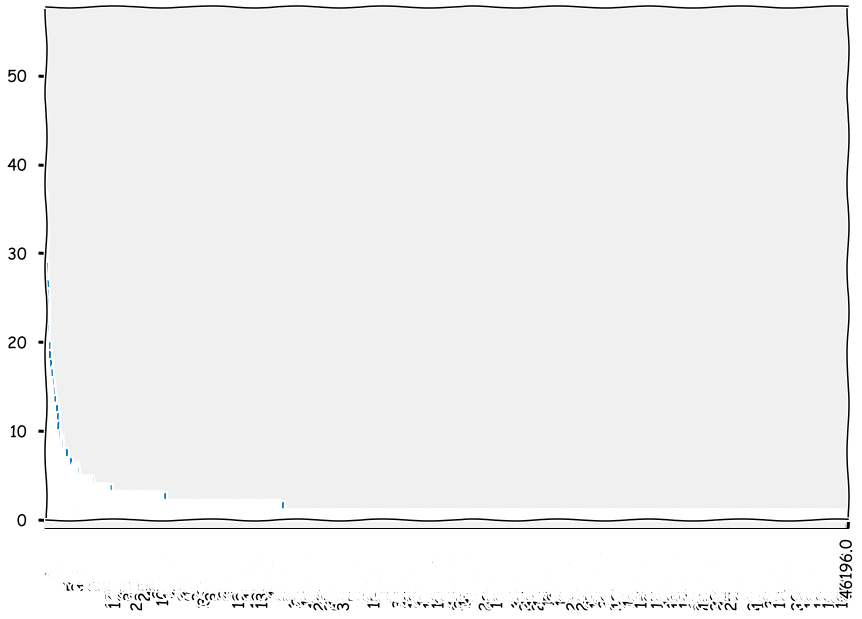

In [271]:
fig,ax = plt.subplots()
mod_df['TOTAL_TESTED'].value_counts().plot(ax=ax, kind='bar')
plt.plot()

In [340]:
mod_df['TOTAL_TESTED'] = mod_df['NEGATIVE']  +  mod_df['POSITIVE']  + mod_df['INCONCLUSIVE'] + mod_df['AWAITING_TESTING']

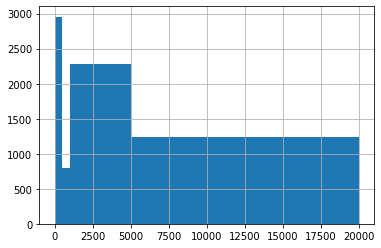

In [206]:
mod_df['TOTAL_TESTED'].hist(bins=[0,500,501,1000,1001,5000,5001,20000])

In [268]:
mod_df.to_csv('Final COVID Only Dataset 7-11-20.txt', sep='\t', index=False)
mod_df.to_csv('Final COVID Only Dataset 7-11-20.csv', sep=',', index=False)

In [242]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

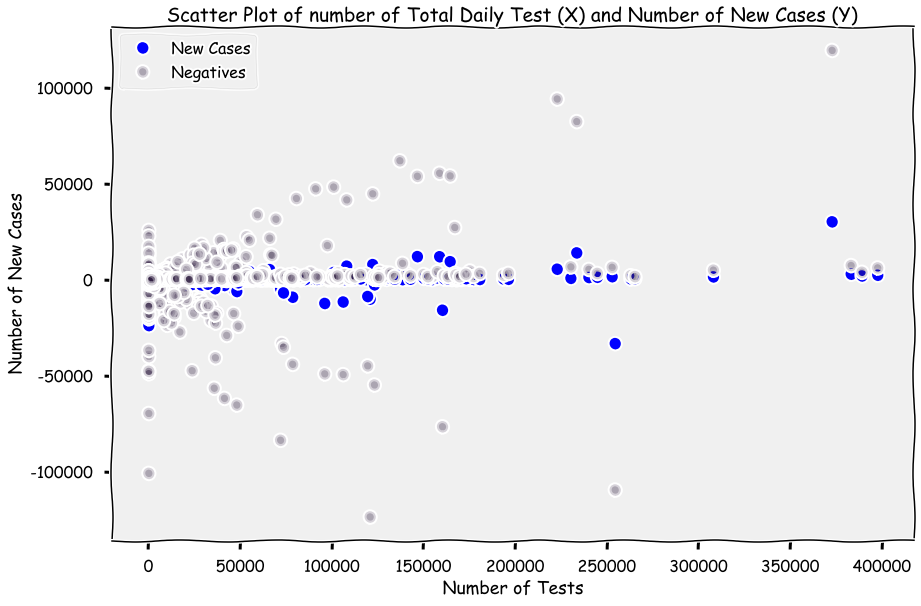

In [484]:
plt.style.use('seaborn-colorblind')
plt.plot(mod_df['TOTAL_TESTED'],mod_df['NEW_CASES'],'bo', label='New Cases')
plt.plot(mod_df['TOTAL_TESTED'],mod_df['NEW_NEGATIVES'], color='#332244',marker='o', linestyle='' , label= 'Negatives', alpha=0.2)
plt.title('Scatter Plot of number of Total Daily Test (X) and Number of New Cases (Y)')
plt.xlabel('Number of Tests')
plt.ylabel('Number of New Cases')
plt.legend()
plt.show()

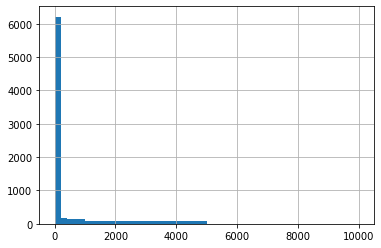

In [199]:
mod_df['NEW_CASES'].hist(bins=[0,199,200,399, 400,1000,1001,5000,5001,10000])

In [506]:
mod_df[['TOTAL_TESTED','COUNTY']].describe()

,TOTAL_TESTED
count,9659.000000
mean,3637.450668
std,17753.795273
min,0.000000
25%,0.000000
50%,0.000000
75%,282.500000
max,397583.000000


### Verifying that the shift worked correctly

In [176]:
mod_df[['COUNTY','NEGATIVE']].sum().to_frame()

,0
COUNTY,AlachuaAlachuaAlachuaAlachuaAlachuaAlachuaAlac...
NEGATIVE,6.28858e+07


### The extreme minimum and maximum might be  correct.
### In the case of negatives they are corrections.

In [505]:
mod_df['NEW_CASES'].describe().to_frame()

,NEW_CASES
count,9591.000000
mean,7.652174
std,741.385345
min,-33261.000000
25%,0.000000
50%,2.000000
75%,9.000000
max,30186.000000


In [275]:
mod_df.filter(items=['NEW_CASES','COUNTY'], axis=1)

,NEW_CASES,COUNTY
0,NaN,Alachua
1,3.0,Alachua
2,0.0,Alachua
3,0.0,Alachua
4,0.0,Alachua
...,...,...
8235,5.0,Washington
8236,1.0,Washington
8237,3.0,Washington
8239,-1.0,Washington


## Observations where the number of new cases is less than 0

In [481]:
# Getting Counties with over 1000 cases reported in one day
high_case = mod_df[mod_df['NEW_CASES']> 1000]
high_case.sort_values(by='NEW_CASES', inplace=True, ascending =False)
print(high_case[['COUNTY', 'NEW_CASES' ,'DATE']].head(100))
top_100 = pd.DataFrame(high_case[['COUNTY', 'NEW_CASES' ,'DATE']].head(100))


            COUNTY  NEW_CASES        DATE
8536          Dade    30186.0  07-07-2020
8537       Broward    14006.0  07-07-2020
8539  Hillsborough    12067.0  07-07-2020
8540        Orange    11995.0  07-07-2020
8538    Palm Beach     9429.0  07-07-2020
...            ...        ...         ...
6612    Palm Beach     1122.0  06-03-2020
8273       Broward     1113.0  07-03-2020
8546       Manatee     1080.0  07-07-2020
7877        Orange     1062.0  06-26-2020
800         Orange     1035.0  03-25-2020

[65 rows x 3 columns]


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [ipykernel_launcher.py:3]


In [482]:
# County
pd.value_counts(high_case['COUNTY'].head(100)).to_frame(name="County")

,County
Dade,18
Broward,9
Orange,6
Hillsborough,5
Palm Beach,4
Duval,3
Collier,2
Lee,2
St. Lucie,1
Lake,1


In [483]:
neg_case = mod_df[mod_df['NEW_CASES']< 0]
neg_case.sort_values(by='NEW_CASES', inplace=True)
print(neg_case[['COUNTY', 'NEW_CASES' ,'DATE']].head(20))
print(neg_case[['COUNTY', 'NEW_CASES' ,'DATE']].tail(20))

            COUNTY  NEW_CASES        DATE
8722          Dade   -33261.0  07-10-2020
8404          Dade   -23857.0  07-06-2020
8723       Broward   -15868.0  07-10-2020
8725  Hillsborough   -12343.0  07-10-2020
8726        Orange   -11579.0  07-10-2020
8405       Broward   -10986.0  07-06-2020
8408        Orange   -10489.0  07-06-2020
8407  Hillsborough   -10405.0  07-06-2020
8907          Dade   -10069.0   5-15-2020
8730         Duval    -9077.0  07-10-2020
8724    Palm Beach    -8727.0  07-10-2020
8406    Palm Beach    -7940.0  07-06-2020
8728      Pinellas    -6855.0  07-10-2020
8412         Duval    -6691.0  07-06-2020
8411      Pinellas    -6175.0  07-06-2020
8909    Palm Beach    -6115.0   5-15-2020
8727           Lee    -5018.0  07-10-2020
8908       Broward    -4704.0   5-15-2020
8409           Lee    -4652.0  07-06-2020
8731          Polk    -4641.0  07-10-2020
          COUNTY  NEW_CASES        DATE
2712  Okeechobee       -1.0  04-08-2020
5592  Okeechobee       -1.0  05-05-202

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [ipykernel_launcher.py:2]


In [73]:
pd.value_counts(neg_case.COUNTY)

St. Johns    34
Collier      33
Brevard      33
Orange       33
Total        33
             ..
Gulf          9
Calhoun       8
Lafayette     8
Franklin      7
Glades        6
Name: COUNTY, Length: 69, dtype: int64

In [67]:
mod_df[mod_df['NEW_CASES']< 0].describe()

,Unnamed: 0,AWAITING_TESTING,INCONCLUSIVE,NEGATIVE,POSITIVE,PERCENT_POSITIVE,TOTAL_TESTED,NEW_NEGATIVES,NEW_CASES
count,1548.000000,1396.000000,779.000000,1.547000e+03,1548.000000,1548.000000,7.080000e+02,1547.000000,1548.000000
mean,2962.465762,56.161175,28.057766,7.762021e+03,1454.863695,89.988372,1.802531e+04,-1925.260504,-484.986434
std,2059.319013,195.983714,108.466943,4.923870e+04,6297.361781,629.437455,7.702989e+04,29389.717986,5302.518945
min,508.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.200000e+01,-845018.000000,-129140.000000
25%,1519.750000,2.000000,1.000000,0.000000e+00,61.000000,5.000000,1.426250e+03,-31.000000,-39.000000
50%,2450.500000,8.000000,2.000000,5.010000e+02,179.500000,8.000000,3.333000e+03,0.000000,-6.000000
75%,3804.250000,29.000000,7.000000,2.972000e+03,584.000000,16.000000,9.616250e+03,0.000000,-2.000000
max,8240.000000,1551.000000,1221.000000,1.264928e+06,101253.000000,12151.000000,1.338137e+06,110975.000000,-1.000000


In [36]:
# mod_df.drop('FILE_NAME1', axis = 1, inplace=True)
mod_df.columns

Index(['Unnamed: 0', 'COUNTY', 'AWAITING_TESTING', 'INCONCLUSIVE', 'NEGATIVE',
       'POSITIVE', 'PERCENT_POSITIVE', 'TOTAL_TESTED', 'FILE_NAME', 'DATE',
       'NEW_NEGATIVES', 'NEW_CASES'],
      dtype='object')

# Messing around with matplotlib

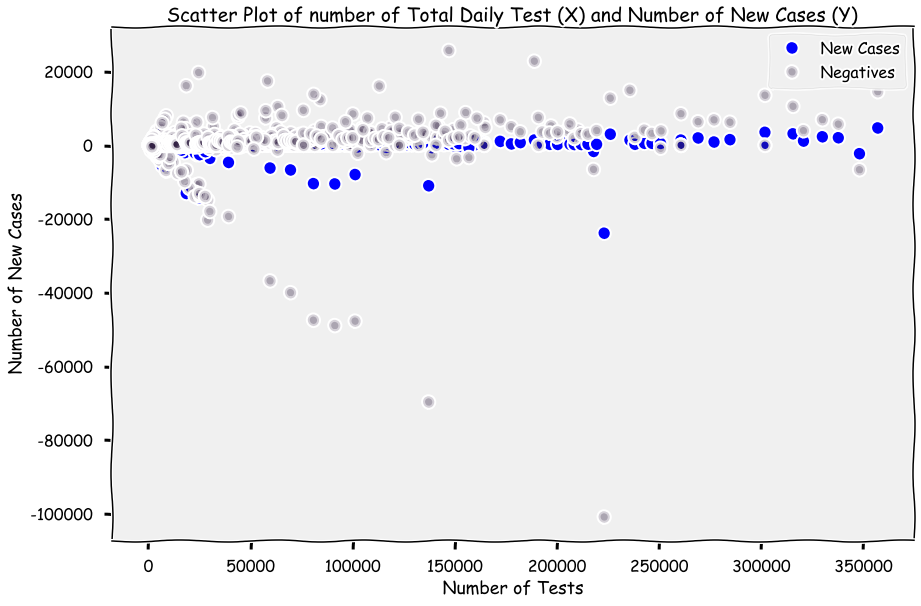

In [265]:
plt.xkcd()
plt.plot(mod_df['TOTAL_TESTED'],mod_df['NEW_CASES'],'bo', label='New Cases')
plt.plot(mod_df['TOTAL_TESTED'],mod_df['NEW_NEGATIVES'], color='#332244',marker='o', linestyle='' , label= 'Negatives', alpha=0.2)
plt.title('Scatter Plot of number of Total Daily Test (X) and Number of New Cases (Y)')
plt.xlabel('Number of Tests')
plt.ylabel('Number of New Cases')
plt.legend()
plt.savefig('plot.png')
plt.show()